In [21]:
from IPython.display import display, clear_output
import pandas as pd
import matplotlib.pyplot as plt


predictions_df = pd.read_csv("predictions.csv")
predictions_df

,img_path,pred_x,pred_y,true_x,true_y,distance
0,Dataset/1765045153101.jpg,0.753074,0.783650,0.990262,0.048240,0.772713
1,Dataset/1765045152845.jpg,0.777479,0.802662,0.987611,0.060746,0.771099
2,Dataset/1765045084920.jpg,0.457838,0.716372,0.794774,0.025375,0.768767
3,Dataset/1755730139772.jpg,0.213041,0.243555,0.312956,0.955867,0.719285
4,Dataset/1765045085174.jpg,0.816124,0.805980,0.842720,0.092171,0.714304
...,...,...,...,...,...,...
6961,Dataset/1755730901989.jpg,0.553358,0.488197,0.551905,0.491609,0.003709
6962,Dataset/1764943957558.jpg,0.606225,0.088687,0.605587,0.085084,0.003659
6963,Dataset/1755731293405.jpg,0.885119,0.808259,0.883877,0.804857,0.003622
6964,Dataset/1755730138751.jpg,0.154468,0.703433,0.152256,0.705875,0.003295


In [22]:
def display_image_with_preds(idx):
    row = predictions_df.iloc[idx]
    img_path = row['img_path']
    pred_x, pred_y = row['pred_x'], row['pred_y']
    true_x, true_y = row['true_x'], row['true_y']

    fig, axs = plt.subplots(1, 2, figsize=(10, 5))

    # Show image on the left
    img = plt.imread(img_path)
    axs[0].imshow(img)
    axs[0].set_title(f"Image: {img_path.split('/')[-1]}")
    axs[0].axis('off')

    # Show prediction and ground truth on the right
    axs[1].plot(1 - pred_x, 1 - pred_y, 'ro', label='Prediction', markersize=10)
    axs[1].plot(1 - true_x, 1 - true_y, 'go', label='Ground Truth', markersize=10)
    axs[1].set_xlim(0, 1)
    axs[1].set_ylim(0, 1)
    axs[1].set_aspect('equal', adjustable='box')
    axs[1].set_xticks([0, 1])
    axs[1].set_yticks([0, 1])
    axs[1].set_title(f"Pred (red): ({pred_x:.2f}, {pred_y:.2f})\nTrue (green): ({true_x:.2f}, {true_y:.2f})")
    axs[1].legend()

    plt.tight_layout()
    plt.show()

    return img_path

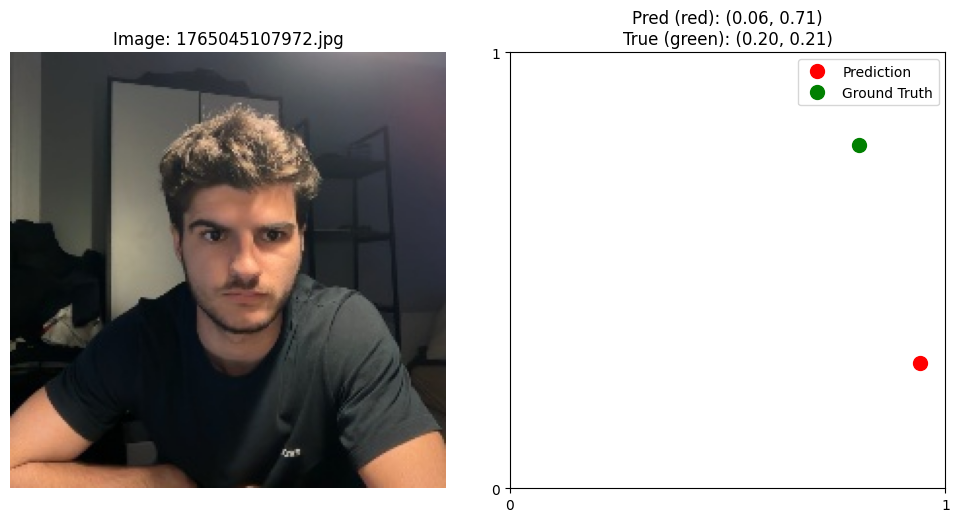

In [23]:
images_to_delete = []

idx = 0
while True:
    img_path = display_image_with_preds(idx)

    choice = input("d (delete) / s (skip) / q (quit)")
    if choice == "d":
        images_to_delete.append(img_path)
    elif choice == "q":
        break

    idx += 1
    
    # Nettoyer l'affichage précédent
    clear_output(wait=True)

In [24]:
print('images_to_delete', images_to_delete)

images_to_delete ['Dataset/1765045084920.jpg', 'Dataset/1765044416369.jpg', 'Dataset/1765044416112.jpg', 'Dataset/1765044437395.jpg', 'Dataset/1765045084667.jpg', 'Dataset/1765045152329.jpg', 'Dataset/1765045152588.jpg', 'Dataset/1765045119224.jpg', 'Dataset/1765045085431.jpg', 'Dataset/1765044423290.jpg', 'Dataset/1755730156916.jpg', 'Dataset/1765044365173.jpg', 'Dataset/1765045085681.jpg', 'Dataset/1765044423035.jpg', 'Dataset/1765045084415.jpg', 'Dataset/1765044441807.jpg', 'Dataset/1765045141037.jpg', 'Dataset/1755898091728.jpg', 'Dataset/1765044417654.jpg', 'Dataset/1765045124614.jpg', 'Dataset/1765029915013.jpg', 'Dataset/1765029879375.jpg', 'Dataset/1765044423543.jpg']


In [25]:
dataset_df = pd.read_csv('dataset.csv')
print('Length of dataset_df', len(dataset_df))

dataset_df[dataset_df['img_filename'].isin(images_to_delete)]
filtered_dataset_df = dataset_df[~dataset_df['img_filename'].isin(images_to_delete)]

filtered_dataset_df.to_csv('dataset_fixed.csv', index=False)
print('Length of filtered_dataset_df', len(filtered_dataset_df))


Length of dataset_df 6966
Length of filtered_dataset_df 6943
